In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [35]:
wine = load_wine(as_frame=True)
data = wine.frame

X = data.drop("target", axis=1)
y = data["target"]


In [36]:
# Binary labels
y_binary = (y == 0).astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
log_reg = LogisticRegression(class_weight="balanced")
log_reg.fit(X_train_scaled, y_train)

# Predict
y_pred = log_reg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0
[[22  0]
 [ 0 14]]


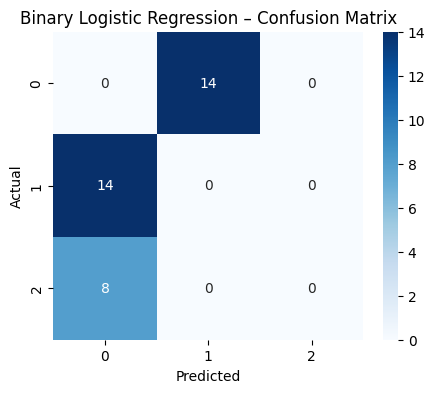

In [44]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Binary Logistic Regression – Confusion Matrix")
plt.show()


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
ovr_model = LogisticRegression(multi_class="ovr", max_iter=500)
ovr_model.fit(X_train_scaled, y_train)

y_pred_ovr = ovr_model.predict(X_test_scaled)

print("OvR Accuracy:", accuracy_score(y_test, y_pred_ovr))
print(confusion_matrix(y_test, y_pred_ovr))


OvR Accuracy: 1.0
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


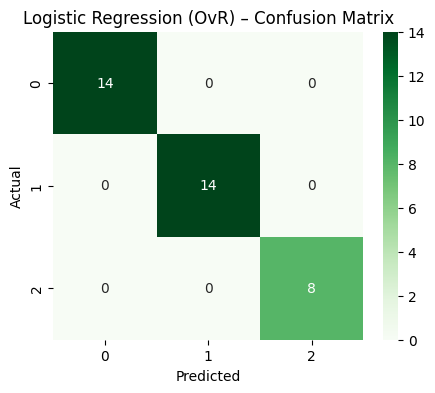

In [40]:
cm_ovr = confusion_matrix(y_test, y_pred_ovr)

plt.figure(figsize=(5,4))
sns.heatmap(cm_ovr, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression (OvR) – Confusion Matrix")
plt.show()


In [41]:
softmax_model = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=500
)

softmax_model.fit(X_train_scaled, y_train)

y_pred_softmax = softmax_model.predict(X_test_scaled)

print("Softmax Accuracy:", accuracy_score(y_test, y_pred_softmax))
print(confusion_matrix(y_test, y_pred_softmax))
print(classification_report(y_test, y_pred_softmax))


Softmax Accuracy: 1.0
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


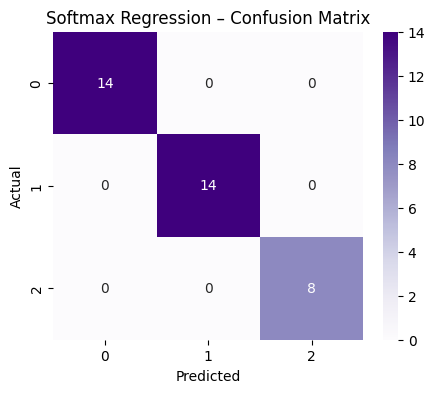

In [42]:
cm_softmax = confusion_matrix(y_test, y_pred_softmax)

plt.figure(figsize=(5,4))
sns.heatmap(cm_softmax, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Softmax Regression – Confusion Matrix")
plt.show()


In [43]:
comparison = pd.DataFrame({
    "Model": ["Logistic (Binary)", "Logistic OvR", "Softmax"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_ovr),
        accuracy_score(y_test, y_pred_softmax)
    ]
})

comparison


,Model,Accuracy
0,Logistic (Binary),0.0
1,Logistic OvR,1.0
2,Softmax,1.0
